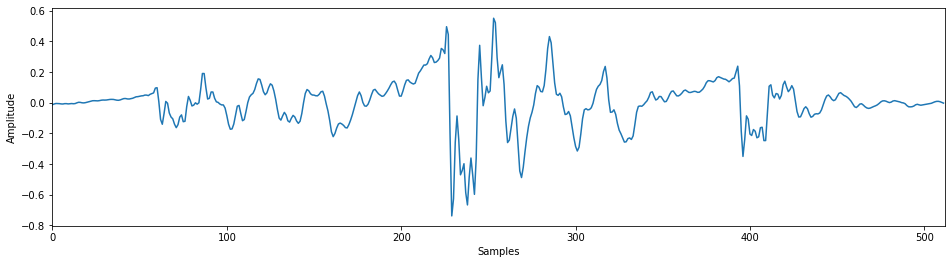

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from audlib.quickstart import welcome
from audlib.sig.window import hamming

STARTING_SAMPLE = 9437
WINDOW_LENGTH = .032  # in seconds

sig, sr = welcome()
wsize = int(WINDOW_LENGTH*sr)
eesig = sig[STARTING_SAMPLE:STARTING_SAMPLE+wsize]  # a segment of \EE\ sound in 'dee'
wind = hamming(wsize) if True else np.ones(wsize)

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(wind*eesig)
ax.set_xlim(0, wsize)
ax.set_xlabel('Samples'); ax.set_ylabel('Amplitude')
plt.show()

MSE using z-transform or DFT method: 0.0000001


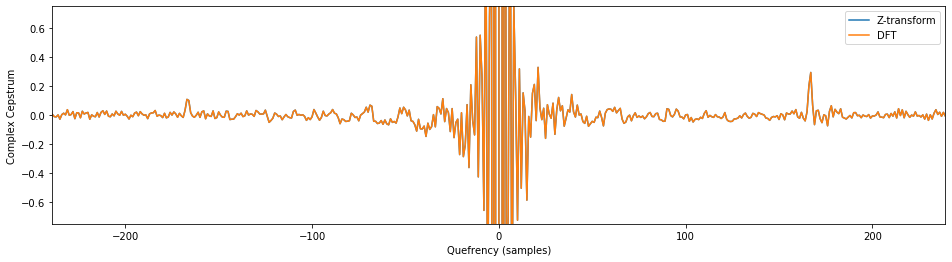

In [2]:
# Compute the complex cepstrum two-way.
from audlib.sig.cepstral import ccep_zt, ccep_dft

NCEPS = int(1.5 * sr / 100)

ccep1 = ccep_zt(wind*eesig, NCEPS)
ccep2 = ccep_dft(wind*eesig, NCEPS)
print(f"MSE using z-transform or DFT method: {((ccep1-ccep2)**2).mean():.7f}")

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(np.arange(-NCEPS+1, NCEPS), ccep1, label='Z-transform')
ax.plot(np.arange(-NCEPS+1, NCEPS), ccep2, label='DFT')
ax.set_xlim(-NCEPS+1, NCEPS-1)
ax.set_ylim(-.75, .75)  # uncomment to see close-up for peaks at pitch period
ax.set_xlabel('Quefrency (samples)'); ax.set_ylabel('Complex Cepstrum')
plt.legend()
plt.show()

MSE using z-transform or DFT method: 0.0000001


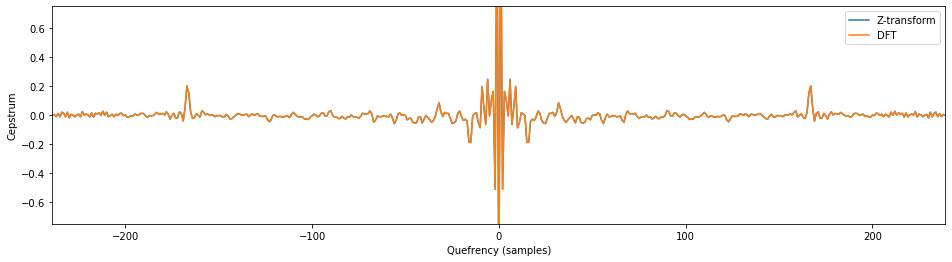

In [3]:
# Compute the cepstrum two-way
from audlib.sig.cepstral import rcep_zt, rcep_dft

NCEPS = int(1.5 * sr / 100)

rcep1 = rcep_zt(wind*eesig, NCEPS)
rcep2 = rcep_dft(wind*eesig, NCEPS)
print(f"MSE using z-transform or DFT method: {((rcep1-rcep2)**2).mean():.7f}")
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(np.arange(-NCEPS+1, NCEPS), np.concatenate((rcep1[1:][::-1], rcep1)), label='Z-transform')
ax.plot(np.arange(-NCEPS+1, NCEPS), np.concatenate((rcep2[1:][::-1], rcep2)), label='DFT')
ax.set_xlim(-NCEPS+1, NCEPS-1)
ax.set_ylim(-.75, .75)  # uncomment to see close-up for peaks at pitch period
ax.set_xlabel('Quefrency (samples)'); ax.set_ylabel('Cepstrum')
plt.legend()
plt.show()